# Instalando librerias necesarias

In [1]:
import sys
!{sys.executable} -m pip install pytz

In [2]:
! pip install pygeohash

In [3]:
! pip install descartes

In [4]:
! pip install matplotlib

# Importando librerias necesarias

In [5]:
import pandas as pd
import numpy as np
import pygeohash as gh
import glob
import os
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

# Paths

In [6]:
ruta_actual = os.path.abspath(os.curdir)
print(ruta_actual)

C:\Users\BS\Documents\Github\Geohashes-Colegios\Codes\Python\Analisis colegios


In [7]:
path_personal = r"C:\Users\BS\Documents\Github"

path_global = path_personal + r"\Geohashes-Colegios"

path_data = path_global + r"\Data"

path_data_colegios = path_data + r"\Colegios"
file_colegios = path_data_colegios + r"\Chile_colegios_original.csv"

path_shapes = path_data + r"\Shapes"
file_shape = path_shapes + r"\Chile\comunas.shp"

path_output = path_data_colegios
file_output = path_data_colegios + r"\Chile_colegios_geohash.csv"

print(file_colegios)
print(file_shape)
print(file_output)

C:\Users\BS\Documents\Github\Geohashes-Colegios\Data\Colegios\Chile_colegios_original.csv
C:\Users\BS\Documents\Github\Geohashes-Colegios\Data\Shapes\Chile\comunas.shp
C:\Users\BS\Documents\Github\Geohashes-Colegios\Data\Colegios\Chile_colegios_geohash.csv


# Agregando geohash a colegios georreferenciados (puntos)

#### Identificadores - Cambiar para cada país

In [8]:
# Coordenadas geograficas
LATITUD = 'LATITUD'
LONGITUD = 'LONGITUD'

In [9]:
# Identificadores de colegios
COD_Interes = 'COD_COM_RBD'

In [10]:
# Identificadores de regiones
ID_regeion = 'cod_comuna'
Nom_region = 'Comuna'

#### Importando archivo de colegios

In [11]:
df = pd.read_csv(file_colegios, sep = ';')

In [12]:
df.shape

(16236, 37)

In [13]:
df.head(5)

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ENS_08,ENS_09,ENS_10,ENS_11,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL
0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,151,...,0,0,0,0,1,1,2,,GRATUITO,GRATUITO
1,2019,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,AYP,151,...,0,0,0,0,1,1,2,,GRATUITO,GRATUITO
2,2019,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,69010100,1,15,AYP,151,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
3,2019,4,3,LICEO OCTAVIO PALMA PEREZ,,69010100,1,15,AYP,151,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
4,2019,5,1,JOVINA NARANJO FERNANDEZ,,69010100,1,15,AYP,151,...,0,0,0,0,1,1,7,PLURALISTA,GRATUITO,GRATUITO


In [14]:
df.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'MRUN', 'RUT_SOSTENEDOR',
       'P_JURIDICA', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD',
       'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD',
       'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'LATITUD', 'LONGITUD',
       'CONVENIO_PIE', 'ENS_01', 'ENS_02', 'ENS_03', 'ENS_04', 'ENS_05',
       'ENS_06', 'ENS_07', 'ENS_08', 'ENS_09', 'ENS_10', 'ENS_11', 'MATRICULA',
       'ESTADO_ESTAB', 'ORI_RELIGIOSA', 'ORI_OTRO_GLOSA', 'PAGO_MATRICULA',
       'PAGO_MENSUAL'],
      dtype='object')

#### Limpieza de colegios sin coordenadas

In [15]:
def clean_lat_long(x):
    x = x.replace(',','.').replace(' ','')
    if len(x) == 0:
        return np.nan
    return float(x)
df['lat'] = df[LATITUD].apply(clean_lat_long)
df['long'] = df[LONGITUD].apply(clean_lat_long)

In [16]:
df = df.drop(columns = [LATITUD, LONGITUD])

In [17]:
df[COD_Interes].unique()

array([15101, 15102, 15201, 15202,  1101,  1404,  1402,  1403,  1405,
        1401,  2301,  2302,  2201,  2202,  2203,  2101,  2102,  2103,
        2104,  3201,  3202,  3101,  3102,  3103,  3301,  3302,  3303,
        3304,  4101,  4104,  4102,  4103,  4106,  4105,  4301,  4305,
        4303,  4302,  4304,  4201,  4204,  4203,  4202,  5401,  5404,
        5402,  5405,  5403,  5301,  5701,  5304,  5302,  5303,  5705,
        5502,  5706,  5704,  5703,  5702,  5501,  5504,  5506,  5503,
        5802,  5103,  5803,  5101,  5109, 13126,  5801,  5107,  5105,
        5804,  5102,  5104,  5601,  5603,  5605,  5604,  5602,  5606,
        5201,  6101,  6106,  6110,  6102,  6108,  6111,  6116,  6115,
        6109,  6114,  6117,  6113,  6112,  6104,  6103,  6105,  6107,
        6301,  6303,  6308,  6305,  6302,  6310,  6304,  6309,  6306,
        6307,  6201,  6206,  6205,  6203,  6202,  6204,  7301,  7308,
        7306,  7304,  7307,  7309,  7302,  7303,  7305,  7101,  7106,
        7110,  7108,

In [18]:
df.shape

(16236, 37)

#### Agregando geohash a coordenadas de colegios

In [19]:
df['geohash'] = df.apply(lambda x: 
                         gh.encode(x.lat, x.long, precision = 7), axis = 1)

In [20]:
df.shape

(16236, 38)

In [21]:
df.head()

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ENS_11,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL,lat,long,geohash
0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,151,...,0,1,1,2,,GRATUITO,GRATUITO,-18.487274,-70.294739,6kwnb6k
1,2019,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,AYP,151,...,0,1,1,2,,GRATUITO,GRATUITO,-18.469862,-70.302757,6kwnbjx
2,2019,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,69010100,1,15,AYP,151,...,0,1,1,1,,GRATUITO,GRATUITO,-18.503580,-70.260826,6kwn9pt
3,2019,4,3,LICEO OCTAVIO PALMA PEREZ,,69010100,1,15,AYP,151,...,0,1,1,1,,GRATUITO,GRATUITO,-18.474243,-70.308266,6kwnbhg
4,2019,5,1,JOVINA NARANJO FERNANDEZ,,69010100,1,15,AYP,151,...,0,1,1,7,PLURALISTA,GRATUITO,GRATUITO,-18.476904,-70.313454,6ktyzur


In [22]:
df.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'MRUN', 'RUT_SOSTENEDOR',
       'P_JURIDICA', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD',
       'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD',
       'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'CONVENIO_PIE', 'ENS_01',
       'ENS_02', 'ENS_03', 'ENS_04', 'ENS_05', 'ENS_06', 'ENS_07', 'ENS_08',
       'ENS_09', 'ENS_10', 'ENS_11', 'MATRICULA', 'ESTADO_ESTAB',
       'ORI_RELIGIOSA', 'ORI_OTRO_GLOSA', 'PAGO_MATRICULA', 'PAGO_MENSUAL',
       'lat', 'long', 'geohash'],
      dtype='object')

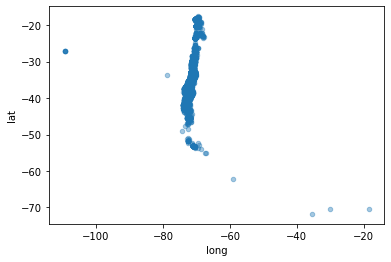

In [23]:
df.plot(kind = "scatter", x = "long", y = "lat", alpha = 0.4)
plt.show()

#### Transformando puntos a shape

Transformando puntos a shape

In [24]:
gdf_puntos = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.long, df.lat), 
                             crs = 'epsg:4326')

In [25]:
gdf_puntos.shape

(16236, 39)

In [26]:
gdf_puntos = gdf_puntos.dropna(subset = ['geohash', 'long', 'lat'])

In [27]:
gdf_puntos.shape

(12937, 39)

In [28]:
gdf_puntos.head()

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL,lat,long,geohash,geometry
0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,151,...,1,1,2,,GRATUITO,GRATUITO,-18.487274,-70.294739,6kwnb6k,POINT (-70.29474 -18.48727)
1,2019,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,AYP,151,...,1,1,2,,GRATUITO,GRATUITO,-18.469862,-70.302757,6kwnbjx,POINT (-70.30276 -18.46986)
2,2019,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,69010100,1,15,AYP,151,...,1,1,1,,GRATUITO,GRATUITO,-18.503580,-70.260826,6kwn9pt,POINT (-70.26083 -18.50358)
3,2019,4,3,LICEO OCTAVIO PALMA PEREZ,,69010100,1,15,AYP,151,...,1,1,1,,GRATUITO,GRATUITO,-18.474243,-70.308266,6kwnbhg,POINT (-70.30827 -18.47424)
4,2019,5,1,JOVINA NARANJO FERNANDEZ,,69010100,1,15,AYP,151,...,1,1,7,PLURALISTA,GRATUITO,GRATUITO,-18.476904,-70.313454,6ktyzur,POINT (-70.31345 -18.47690)


Graficando shapefiles generado (puntos)

<AxesSubplot:>

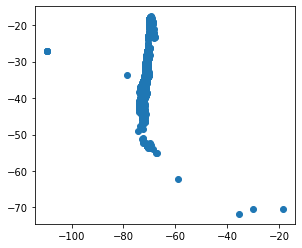

In [29]:
gdf_puntos.plot()

#### Agrega regiones a geohashes de colegios

Cargando shapefile de regiones

In [30]:
mapa = gpd.read_file(file_shape)
mapa = mapa.to_crs("epsg:4326")

In [31]:
mapa.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-71.80071 -34.20728, -71.79992 -34.2..."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-70.35293 -33.95263, -70.35243 -33.9..."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-70.90058 -34.23703, -70.90063 -34.2..."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-71.02492 -34.17053, -71.02320 -34.1..."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-72.95898 -38.46877, -72.95797 -38.4..."


Dibujando shapefile de regiones

<AxesSubplot:>

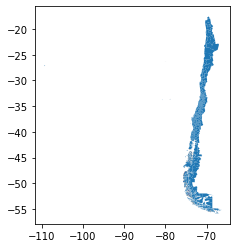

In [32]:
mapa.plot()

Cruzando shapefiles - Puntos y Polígonos

In [33]:
mapa = mapa.loc[:, [ID_regeion, Nom_region, 'geometry']]
mapa.head()

,cod_comuna,Comuna,geometry
0,6204,Marchigüe,"POLYGON ((-71.80071 -34.20728, -71.79992 -34.2..."
1,6102,Codegua,"POLYGON ((-70.35293 -33.95263, -70.35243 -33.9..."
2,6103,Coinco,"POLYGON ((-70.90058 -34.23703, -70.90063 -34.2..."
3,6104,Coltauco,"POLYGON ((-71.02492 -34.17053, -71.02320 -34.1..."
4,9121,Cholchol,"POLYGON ((-72.95898 -38.46877, -72.95797 -38.4..."


In [34]:
df_final = gpd.sjoin(gdf_puntos, mapa, op ='within')

In [35]:
df_final = df_final.drop(columns = ['index_right'])

In [36]:
gdf_puntos.shape

(12937, 39)

In [37]:
df_final.shape

(12917, 41)

In [38]:
df_final.head()

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL,lat,long,geohash,geometry,cod_comuna,Comuna
0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,151,...,2,,GRATUITO,GRATUITO,-18.487274,-70.294739,6kwnb6k,POINT (-70.29474 -18.48727),15101,Arica
1,2019,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,AYP,151,...,2,,GRATUITO,GRATUITO,-18.469862,-70.302757,6kwnbjx,POINT (-70.30276 -18.46986),15101,Arica
2,2019,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,69010100,1,15,AYP,151,...,1,,GRATUITO,GRATUITO,-18.503580,-70.260826,6kwn9pt,POINT (-70.26083 -18.50358),15101,Arica
3,2019,4,3,LICEO OCTAVIO PALMA PEREZ,,69010100,1,15,AYP,151,...,1,,GRATUITO,GRATUITO,-18.474243,-70.308266,6kwnbhg,POINT (-70.30827 -18.47424),15101,Arica
4,2019,5,1,JOVINA NARANJO FERNANDEZ,,69010100,1,15,AYP,151,...,7,PLURALISTA,GRATUITO,GRATUITO,-18.476904,-70.313454,6ktyzur,POINT (-70.31345 -18.47690),15101,Arica


# Exportando resultados

In [39]:
df_final.to_csv(file_output, sep = ',', index_label = 'row_number')

In [40]:
df.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'MRUN', 'RUT_SOSTENEDOR',
       'P_JURIDICA', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD',
       'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD',
       'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'CONVENIO_PIE', 'ENS_01',
       'ENS_02', 'ENS_03', 'ENS_04', 'ENS_05', 'ENS_06', 'ENS_07', 'ENS_08',
       'ENS_09', 'ENS_10', 'ENS_11', 'MATRICULA', 'ESTADO_ESTAB',
       'ORI_RELIGIOSA', 'ORI_OTRO_GLOSA', 'PAGO_MATRICULA', 'PAGO_MENSUAL',
       'lat', 'long', 'geohash', 'geometry'],
      dtype='object')